# Naravni zlepek

Danih je $n$ interpolacijskih točk $(x_i, y_i), i=1,2,...,n$. Naravni interpolacijski zlepek $S$ je funkcija, ki izpolnjuje naslednje pogoje:

1. $S(x) = y_i, \quad i=1,2,...,n$
2. $S$ je polinom stopnje **3 ali manj** na vsakem podintervalu $[x_i, x_{i+1}], i=1,2,...,n-1$
3. $S$ je dvakrat zvezno odvedljiva funkcija na interpolacijskem intervalu $[x_1, x_n]$
4. $S''(x_1) = S''(x_n) = 0$

Zlepek $S$ določimo tako, da predpostavimo:
$$
S(x) = S_i(x) = a_i + b_i(x-x_i) + c_i(x-x_i)^2 + d_i(x-x_i)^3, \quad x \in [x_i, x_{i+1}]
$$
nato pa izpolnemo zahtevane pogoje.

Vemo, da $S''(x_1) = S''(x_n) = 0$, torej lahko formuliramo drugi odvod zlepka, ki deluje na vrednostih $(x_i, z_i)$ kot:
$$
S''_i(x) = z_i \frac{x - x_{i+1}}{x_i - x_{i+1}} + z_{i+1} \frac{x - x_i}{x_{i+1} - x_i}
$$

Če dolžine posameznih intervalov označimo kot $h_i = x_{i+1} - x_i, \quad i = 0, ..., n$, lahko zapišemo:
$$
S''(x) = z_{i+1} \frac{x - t_i}{h_i} + z_i \frac{x_{i+1} - x}{h_i}
$$

Z dvojnim integriranjem dobimo enačbo za $S_i(x)$:
$$
S_i(x) = \frac{z_{i+1}}{6h_i}(x - x_i)^3 + \frac{z_i}{6h_i}(t_{i+1} - x)^3 + c_i(x - x_i)^2 + d_i(x - x_i)
$$

Iz tega dobimo naslednje enačbe interpolacijskega zlepka:
$$
S_i(x_i) = y_i \Rightarrow \frac{z_i}{6} h_i^2 + d_i h_i = y_i, \quad i = 1, ..., n \\
\quad \\
S_i(x_{i+1}) = y_{i+1} \Rightarrow \frac{z_{i+1}}{6} h_i^2 + c_i h_i = y_{i+1}, \quad i = 1, ..., n \\
\quad \\
S_i(x) = \frac{z_{i+1}}{6h_i}(x - x_i)^3 + \frac{z_i}{6h_i}(t_{i+1} - x)^3 + \left( \frac{y_{i+1}}{h_i} - \frac{z_{i+1}}{6} h_i \right) (x - x_i) + \left( \frac{y_i}{h_i} - \frac{h_i}{6} z_i \right) (x_{i+1} - x) 
$$

Vzamemo odvod zgornje enačbe, da dobimo:
$$
S'_i(x) = \frac{z_{i+1}}{2h_i}(x - x_i)^2 - \frac{z_i}{2h_i} (t_{i+1} - x)^2 + \frac{1}{h_i} (y_{i+1} - y_i) - \frac{h_i}{6} (z_{i+1} - z_i) \\
\quad \\
m_i = \frac{1}{h_i} (y_{i+1} - y_i)
$$

To nam, da naslednji sistem enačb iz podanih točk:
$$
\begin{align*}
S'_i(x_i) & = - \frac{1}{2} z_i h_i + m_i - \frac{h_i}{6} z_{i+1} + \frac{1}{6} h_i z_i \\
\quad \\
S'_i(x_{i+1}) & =\frac{z_{i+1}}{2}h_i + m_i - \frac{h_i}{6} z_{i+1} + \frac{1}{6} h_i z_i \\
\quad \\
S_{i-1}(x_i) & = \frac{1}{3} z_i h_{i+1} + \frac{1}{6} h_{i-1} z_{i-1} + b_{i-1} \\
\quad \\
S'_i(x_i) = S_{i-1}'(x_i) & \Rightarrow
6(m_i - m_{i-1}) = h_{i-1} z_{i-1} + 2(h_{i-1} + h_i) z_i + h_i z_{i+1}
\end{align*}
$$

Torej lahko rešujemo linearni sistem naslednje oblike:
$$
h_i = x_{i+1} - x_i, \quad i = 1, ..., n \quad m_i = \frac{1}{h_i} (y_{i+1} - y_i), \quad i = 1, ..., n \\
\quad \\
v_i = 2(h_{i-1} + h_i), \quad i = 2, ..., n-1 \quad u_i = 6(m_i - m_{i-1}), \quad i = 2, ..., n \\
z_0 = z_n = 0 \\
\quad \\
\begin{bmatrix}
v_1 & h_1 & 0 & 0 & \cdots & 0 \\   
h_1 & v_2 & h_2 & 0 & \cdots & 0 \\
0 & h_2 & v_3 & h_3 & \cdots & 0 \\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
0 & \cdots & 0 & 0 & h_{n-2} & v_{n-1} \\
\end{bmatrix}
\begin{bmatrix}
z_1 \\
z_2 \\
\vdots \\
z_{n-1}
\end{bmatrix}
=
\begin{bmatrix}
u_1 \\
u_2 \\
\vdots \\
u_{n-1}
\end{bmatrix}
$$

## Naloga

Napišite funkcijo `Z = interpoliraj(x, y)`, ki izračuna koeficient polinoma $S_i$ in vrne lement tipa `Zlepek`. Tip `Zlepek` definirajte sami in naj vsebuje koeficiente polinoma in interpolacijske točke. Za tip `Zlepek` definirajte funkciji:

- `y = vrednost(Z, x)`, ki vrne vrednost zlepka v točki `x`
- `plot(Z)`, ki nariše graf zlepka, tako da različne odseke izmenično nariše z rdečo in modro barvo (uporabi paket `Plots`)

[0.0, 1.5707963267948966, 3.141592653589793, 4.71238898038469, 6.283185307179586]
[0.0, 1.0, 1.2246467991473532e-16, -1.0, -2.4492935982947064e-16]


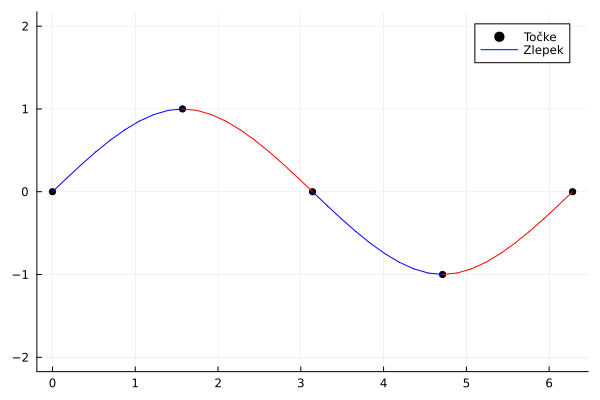

In [3]:
# Primer uporabe funkcije interpoliraj
include("spline.jl")

x = range(0, 2pi, length=5) .+ 0.0 * rand(5)
println(x)
println(sin.(x))
y = sin.(x)
zlepek = interpoliraj(x, y)
plotZlepek(zlepek)

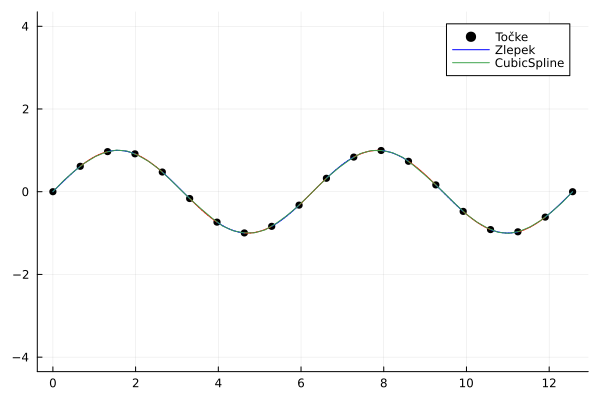

In [6]:
import Random
Random.seed!(1234)

xdata = [x for x in range(0,stop=4pi,length=20)]
ydata = sin.(xdata)

zlepek = interpoliraj(xdata, ydata)

using CubicSplines
spline = CubicSpline(xdata, ydata)
xs = range(xdata[1], stop=xdata[end], length=50)
ys = spline[xs]

plotZlepek(zlepek)
plot!(xs, ys, label="CubicSpline")

In [1]:
zeros(5,2)

5×2 Matrix{Float64}:
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0